## Breast Cancer 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import GaussianNB
import datetime
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
import math
import os
import seaborn as sns
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'

In [2]:
path2dat='data_breastcancer/data.csv'
dat=pd.read_csv(path2dat)
df=pd.DataFrame(dat)

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


General overview of the data set and some of the statistical factors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
list(df)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

Remove null column

In [6]:
df_clean=df.drop(df.columns[-1],axis=1)

# Exploratory analysis.

First lets look at the correlations between the different features. We dont have any domain specific knowledge but we could apply some dimension reduction in order to improve a model down the line.



In [7]:
%run -i plotting_def.ipynb

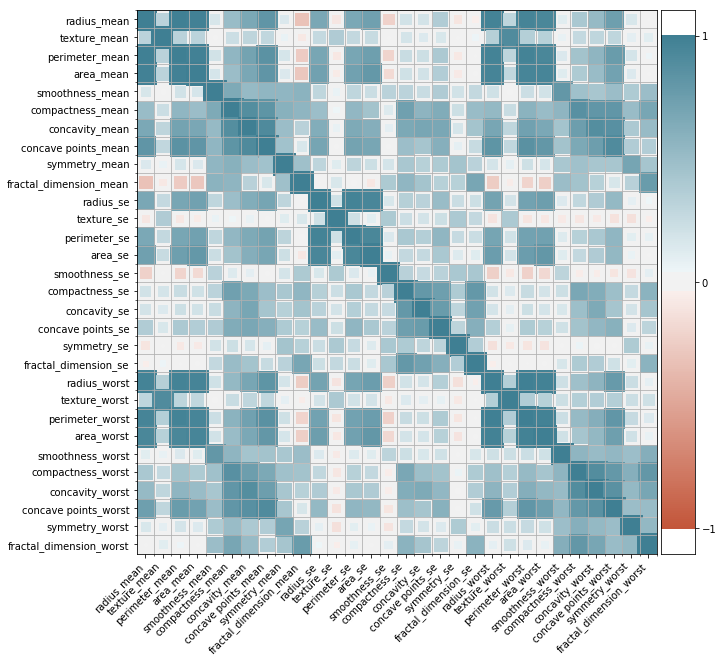

In [8]:
df_clean=df.drop(df.columns[-1],axis=1)
df_map=df_clean.drop(df_clean.columns[0:1],axis=1)
y=df_clean['diagnosis'].replace(('M','B'),(1,0), inplace=True)
x=df_clean.drop('diagnosis',axis=1)
plt.figure(figsize=(10, 10))
corrplot(df_map.corr())

## Principle Component Analysis

In this section we should cluster the data in terms of malignant and banine and perform the analysis. In addition, we will try to reduce the dimensionality of the problem.



In [9]:
mask_b=(df_clean['diagnosis']==0)
mask_m=(df_clean['diagnosis']==1)

In [10]:
df_b=df_clean[mask_b]
df_m=df_clean[mask_m]

In [11]:
print('Number of Benign biopsies: ', sum(mask_b))
print('Number of Malignent biopsies: ', sum(mask_m))

Number of Benign biopsies:  357
Number of Malignent biopsies:  212


For the moment we do not change the distribution of M and B to be equal but we could in the future to see how this impacts the accuracy of the models.

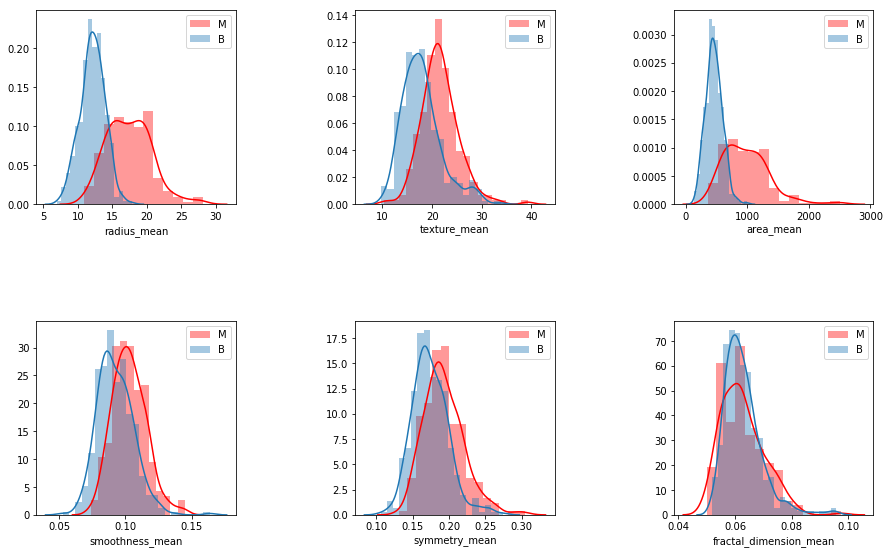

In [12]:
fig=plt.figure(1)
fig.subplots_adjust(hspace=0.6,wspace=0.6)
fig.set_figheight(15)
fig.set_figwidth(15)
ax=fig.add_subplot(3,3,1)
sns.distplot(df_m['radius_mean'],label='M',color='r')
sns.distplot(df_b['radius_mean'],label='B')
plt.legend()
ax=fig.add_subplot(3,3,2)
sns.distplot(df_m['texture_mean'],label='M',color='r')
sns.distplot(df_b['texture_mean'],label='B')
plt.legend()
ax=fig.add_subplot(3,3,3)
sns.distplot(df_m['area_mean'],label='M',color='r')
sns.distplot(df_b['area_mean'],label='B')
plt.legend()
ax=fig.add_subplot(3,3,4)
sns.distplot(df_m['smoothness_mean'],label='M',color='r')
sns.distplot(df_b['smoothness_mean'],label='B')
plt.legend()
ax=fig.add_subplot(3,3,5)
sns.distplot(df_m['symmetry_mean'],label='M',color='r')
sns.distplot(df_b['symmetry_mean'],label='B')
plt.legend()
ax=fig.add_subplot(3,3,6)
sns.distplot(df_m['fractal_dimension_mean'],label='M',color='r')
sns.distplot(df_b['fractal_dimension_mean'],label='B')
plt.legend()

We can compare the features depending on their label



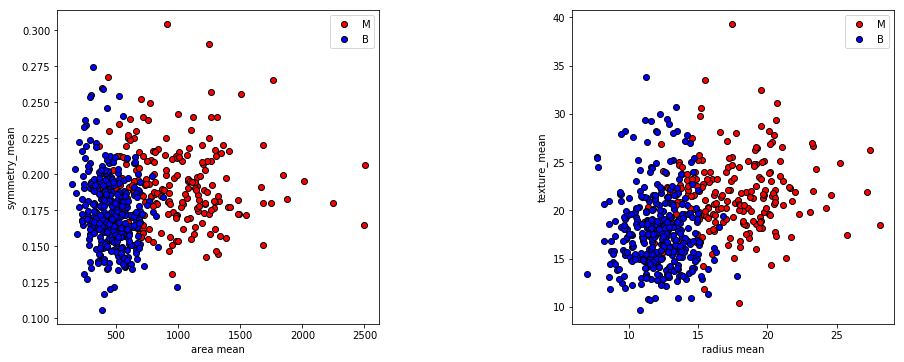

In [13]:
fig=plt.figure(2)
fig.subplots_adjust(hspace=0.6,wspace=0.6)
fig.set_figheight(15)
fig.set_figwidth(15)
ax=fig.add_subplot(2,2,1)
plt.plot(df_m['area_mean'],df_m['symmetry_mean'],'ok',markerfacecolor='r',markeredgecolor='k',label='M')
plt.plot(df_b['area_mean'],df_b['symmetry_mean'],'ok',markerfacecolor='b',markeredgecolor='k',label='B')
plt.xlabel('area mean')
plt.ylabel('symmetry_mean')
plt.legend()
fig.subplots_adjust(hspace=0.6,wspace=0.6)
fig.set_figheight(15)
fig.set_figwidth(15)
ax=fig.add_subplot(2,2,2)
plt.plot(df_m['radius_mean'],df_m['texture_mean'],'ok',markerfacecolor='r',markeredgecolor='k',label='M')
plt.plot(df_b['radius_mean'],df_b['texture_mean'],'ok',markerfacecolor='b',markeredgecolor='k',label='B')
plt.xlabel('radius mean')
plt.ylabel('texture_mean')
plt.legend()

## Feature scaling
Since some of the algorthms (knn) depend on the euclidean distance, we need to scale the features to ensure that any magnitude difference between the variables wont impact the performance

In [14]:
xdat=df_clean.drop('diagnosis',axis=1)
xdat=xdat.drop('id',axis=1)
ydat=df_clean['diagnosis']

xtrain,xtest,ytrain,ytest=train_test_split(xdat,ydat,test_size=0.2,random_state=0)

In [15]:
ss=StandardScaler()
xtrain_scale=ss.fit_transform(xtrain)
xtest_scale=ss.transform(xtest)

In [16]:
pcafull=PCA()
pcafull.fit(xtrain_scale)
varRatio=pcafull.explained_variance_ratio_
print(varRatio)

[4.34307675e-01 1.97401146e-01 9.35177070e-02 6.67766058e-02
 5.64245165e-02 4.07161938e-02 2.14925398e-02 1.51269268e-02
 1.39676264e-02 1.16009156e-02 1.01216224e-02 8.97175303e-03
 7.71439121e-03 5.55309643e-03 3.11522438e-03 2.64580181e-03
 1.99647487e-03 1.70618303e-03 1.50414589e-03 1.06143766e-03
 9.94608221e-04 8.78454935e-04 7.24281209e-04 5.81085817e-04
 5.46645369e-04 2.61499457e-04 2.16152203e-04 4.62504070e-05
 2.53207432e-05 3.71910834e-06]


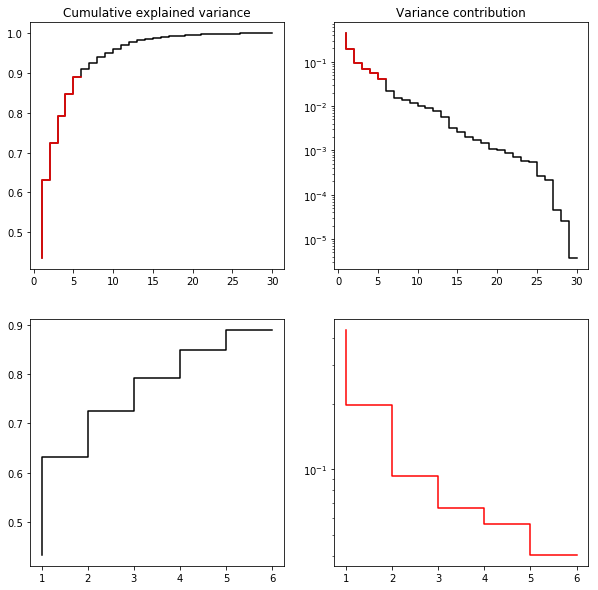

In [17]:
f, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
indexEllbow = 6
a[0, 0].step(range(1, xtrain_scale.shape[1]+1), np.cumsum(varRatio),'k');
a[0, 0].step(range(1, indexEllbow+1), np.cumsum(varRatio[:indexEllbow]),'r')
a[0, 0].set_title("Cumulative explained variance")
a[0, 1].set_title("Variance contribution")
a[0, 1].set_yscale("log")
a[0, 1].step(range(1, xtrain_scale.shape[1]+1), varRatio,'-k');

a[0, 1].step(range(1, indexEllbow+1), varRatio[:indexEllbow],'r');
#a[0, 1].set_ylim([1.0E-6, 1.0])

a[1, 0].step(range(1, indexEllbow+1), np.cumsum(varRatio[:indexEllbow]),'k')
a[1, 1].set_yscale("log")
a[1, 1].step(range(1, indexEllbow+1), varRatio[:indexEllbow],'r');

Text(0, 0.5, 'Variance')

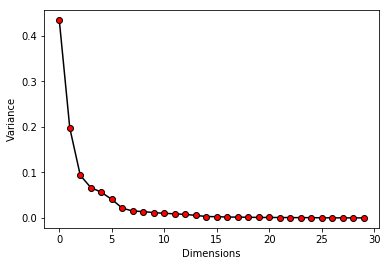

In [18]:
plt.plot(varRatio,'-ok',markerfacecolor='r',markeredgecolor='k')
plt.xlabel('Dimensions')
plt.ylabel('Variance')

From the plot above we can see the variance with the number of variables. Here we could perform some dimensionality reduction to potentially improve the accuracy of the fitting (especially for the Naive Bayes) however as a first attempt we wont.

## Implementing the machine learning models
In this section we will apply some of the machine learning models to the scaled data

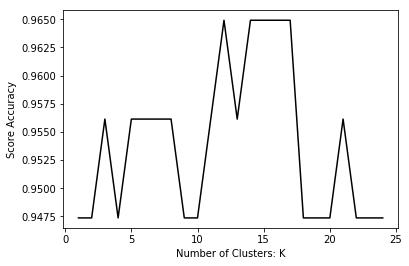

In [19]:
# KNN
krange=range(1,25)
scores={}
scores_list=[]
for k in krange:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain_scale,ytrain)
    y_pred=knn.predict(xtest_scale)
    scores[k]=metrics.accuracy_score(ytest,y_pred)
    scores_list.append(metrics.accuracy_score(ytest,y_pred))
    
plt.figure()
plt.plot(krange,(scores_list),'-k',markerfacecolor='r',markeredgecolor='k')
plt.xlabel('Number of Clusters: K')
plt.ylabel('Score Accuracy')

max_score=max(scores_list)
fpr,tpr,thresholds=roc_curve(ytest,y_pred)

In [20]:
print('Results from KNN')
print('-------------------------------------------------')
print('Maximum model accuracy: ', max_score*100,'%')
print('Best K value is: ' ,(1+scores_list.index(max_score)))
print('Error rate is : ', 100-max_score*100,'%')
print('F1 Score', f1_score(y_pred,ytest,average='binary'))
print('Area Under Curve: ', auc(fpr,tpr))

Results from KNN
-------------------------------------------------
Maximum model accuracy:  96.49122807017544 %
Best K value is:  12
Error rate is :  3.5087719298245617 %
F1 Score 0.9318181818181819
Area Under Curve:  0.9361702127659575


[[67  0]
 [ 6 41]]
Normalized confusion matrix
[[1.         0.        ]
 [0.12765957 0.87234043]]


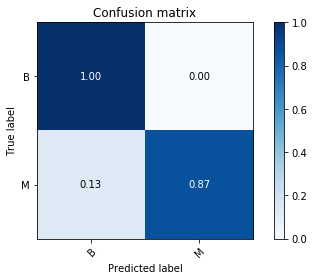

In [21]:
confusion_mat=confusion_matrix(ytest,y_pred)
print(confusion_mat)
plot_confusion_matrix(ytest,y_pred,classes=xtest_scale,normalize=True,title='Confusion matrix')

However when we cycle through different numbers of classifiers we have a tendancy to overfit the problem. Since the choice is binary we should use k=2

In [22]:
knn_red=neighbors.KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2,weights='uniform')
knn_red.fit(xtrain_scale,ytrain)
y_pred_red=knn_red.predict(xtest_scale)
score_red=metrics.accuracy_score(ytest,y_pred_red)
fpr,tpr,thresholds=roc_curve(ytest,y_pred_red)

print('Results from KNN')
print('-------------------------------------------------')
print('Maximum model accuracy: ', score_red*100,'%')
print('Error rate is : ', 100-score_red*100,'%')
print('F1 Score', f1_score(y_pred_red,ytest,average='binary'))
print('Area Under Curve: ', auc(fpr,tpr))

Results from KNN
-------------------------------------------------
Maximum model accuracy:  94.73684210526315 %
Error rate is :  5.26315789473685 %
F1 Score 0.9318181818181819
Area Under Curve:  0.9361702127659575


[[67  0]
 [ 6 41]]
Normalized confusion matrix
[[1.         0.        ]
 [0.12765957 0.87234043]]


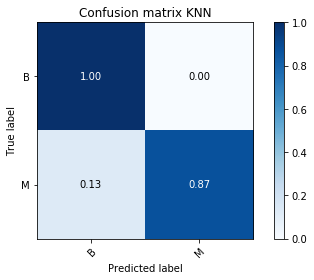

In [23]:
confusion_mat=confusion_matrix(ytest,y_pred_red)
print(confusion_mat)
plot_confusion_matrix(ytest,y_pred_red,classes=xtest_scale,normalize=True,title='Confusion matrix KNN')

In [24]:
## Naive Bayes
nb=GaussianNB()
nb.fit(xtrain_scale,ytrain)
ynb=nb.predict(xtest_scale)
fpr,tpr,thresholds=roc_curve(ytest,ynb)

print('Results from Naive Bayes')
print('-------------------------------------------------')
print('Maximum model accuracy: ',metrics.accuracy_score(ytest,ynb)*100,'%')
print('Error rate is : ', 100-(metrics.accuracy_score(ytest,ynb)*100),'%')
print('F1 Score', f1_score(ynb,ytest,average='binary'))
print('Area Under Curve: ', auc(fpr,tpr))

Results from Naive Bayes
-------------------------------------------------
Maximum model accuracy:  90.35087719298247 %
Error rate is :  9.649122807017534 %
F1 Score 0.8842105263157894
Area Under Curve:  0.9020323912353128


[[61  6]
 [ 5 42]]
Normalized confusion matrix
[[0.91044776 0.08955224]
 [0.10638298 0.89361702]]


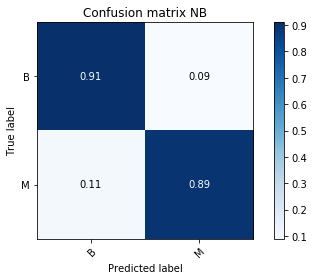

In [25]:
confusion_mat=confusion_matrix(ytest,ynb)
print(confusion_mat)
plot_confusion_matrix(ytest,ynb,classes=xtest_scale,normalize=True,title='Confusion matrix NB')

In [26]:
## DT
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(xtrain_scale,ytrain)
ydt=dt.predict(xtest_scale)
fpr,tpr,thresholds=roc_curve(ytest,ydt )

print('Results from Decision Tree')
print('-------------------------------------------------')
print('Maximum model accuracy: ',metrics.accuracy_score(ytest,ydt)*100,'%')
print('Error rate is : ', 100-(metrics.accuracy_score(ytest,ydt)*100),'%')
print('F1 Score', f1_score(ydt,ytest,average='binary'))
print('Area Under Curve: ', auc(fpr,tpr))

Results from Decision Tree
-------------------------------------------------
Maximum model accuracy:  92.98245614035088 %
Error rate is :  7.017543859649123 %
F1 Score 0.9166666666666666
Area Under Curve:  0.9307716735471578


Normalized confusion matrix
[[0.92537313 0.07462687]
 [0.06382979 0.93617021]]


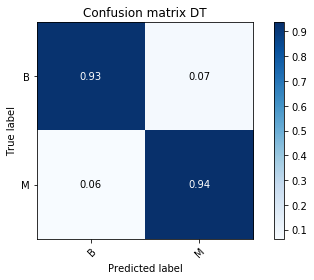

In [27]:
plot_confusion_matrix(ytest,ydt,classes=xtest_scale,normalize=True,title='Confusion matrix DT')

In [28]:
## Random Forest
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
classifier.fit(xtrain_scale,ytrain)
yrf=classifier.predict(xtest_scale)
fpr,tpr,thresholds=roc_curve(ytest,yrf )

print('Results from Random Forest')
print('-------------------------------------------------')
print('Maximum model accuracy: ',metrics.accuracy_score(ytest,yrf)*100,'%')
print('Error rate is : ', 100-(metrics.accuracy_score(ytest,yrf)*100),'%')
print('F1 Score', f1_score(yrf,ytest,average='binary'))
print('Area Under Curve: ', auc(fpr,tpr))



Results from Random Forest
-------------------------------------------------
Maximum model accuracy:  97.36842105263158 %
Error rate is :  2.631578947368425 %
F1 Score 0.967741935483871
Area Under Curve:  0.971260717688155


Normalized confusion matrix
[[0.98507463 0.01492537]
 [0.04255319 0.95744681]]


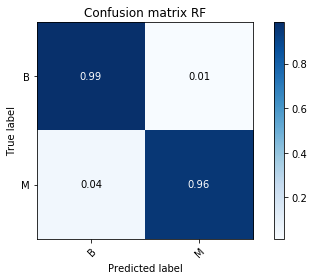

In [29]:
plot_confusion_matrix(ytest,yrf,classes=xtest_scale,normalize=True,title='Confusion matrix RF')

As we can see the Random forest performs the best compared to the KNN, DT and NB. The random forest is an example of an ensemble learning method. It constructs mulitple decision trees and uses the general technique of bagging.

In [30]:
## Neural Network
model=Sequential()
n_cols=30
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [31]:
early_stopping_monitor=EarlyStopping(patience=3)
model.fit(xtrain_scale,ytrain,validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

NameError: name 'EarlyStopping' is not defined

In [32]:
ypred_nn=model.predict(xtest_scale)
score_nn,acc=model.evaluate(xtest_scale,ytest)
print('Results from Neural Network')
print('-------------------------------------------------')
print('Score: ', score_nn)
print('Accuracy: ', acc*100,'%')

NameError: name 'model' is not defined

In [33]:
## Plot losses as a function EPOCH...

# Comparison of models
Comparison of model scores

In [38]:
ml_models=[y_pred_red,ynb,ydt,yrf] #'ypred_nn'
ml_label=['K Nearest Neighbours','Naive Bayes','Decision Tree','Random Forest']
ml_scores=np.zeros(len(ml_models))
num_ml_models=range(1,len(ml_models)+1)
for i in range(0,len(ml_models)):
    # No KERAS installed on this computer
    #if np.mean(ml_models[i])!=np.mean(ypred_nn) or ypred_nn not in locals():
    #    ml_scores[i]=metrics.accuracy_score(ytest,ml_models[i])
    #else:
    #    ml_scores[i]=acc
    
    ml_scores[i]=metrics.accuracy_score(ytest,ml_models[i])

Text(0, 0.5, 'Accuracy (%)')

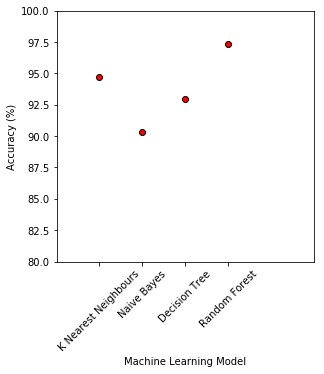

In [39]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.6,wspace=0.6)
fig.set_figheight(12)
fig.set_figwidth(12)
ax=fig.add_subplot(2,2,1)
plt.plot(num_ml_models[0:4],ml_scores[0:4]*100,'ok',markerfacecolor='r',markeredgecolor='k')
ax.set_xticks(num_ml_models[0:4])
ax.set_xticklabels(ml_label[0:4])
plt.xticks(rotation=45)
plt.axis([0,6,0.8*100,1.0*100])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy (%)')

## Summary
From the different models we can compare their predictive accuracy. However these are just first attempts and could be improved with further feature exploration and PCA analysis. The neural network performs reasonably well with an accuracy of about 95% however is still lower than the random forest. The random forest is a good starting point for the analysis and development of the NN. With further training and a more indepth analysis one could expect to see an improvement.